## Exercise: Predict House Quality with a Decision Tree

Let’s now apply what we’ve learned on a real-world dataset!

Use the **King County housing dataset** `kc_house_data.csv`, which includes house features and sale prices.

### Tasks:

1. Import the dataset

2. Create a new binary column `good_bad`:  Set it to 1 if `grade > 7`, else 0.

3. Remove outliers:  Keep only rows where `sqft_living < 8000` and `bedrooms < 10`.

4. Split the dataset into training and test sets  (e.g., 80% training, 20% testing)

5. Train a `DecisionTreeClassifier` using these features: `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`. Use entropy as the criterion and a max depth of three.

6. What is the most informative feature (top of the tree)?

7. Evaluate model accuracy.

8. Increase `max_depth` to 25, retrain, and re-evaluate. Does accuracy improve?

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/digital-sustainability/SAI3-2025/refs/heads/main/datasets/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df_condition = (df.grade > 7)
df_condition = df_condition.astype(int)
df_condition

0        0
1        0
2        0
3        0
4        1
        ..
21608    1
21609    1
21610    0
21611    1
21612    0
Name: grade, Length: 21613, dtype: int64

In [4]:
df["good_bad"] = (df.grade > 7).astype(int)
df[["grade", "good_bad"]].head()

,grade,good_bad
0,7,0
1,7,0
2,6,0
3,7,0
4,8,1


In [5]:
df = df[df.sqft_living < 8000]
df = df[df.bedrooms < 10]

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((17278, 22), (4320, 22))

In [7]:
features = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors"]

X_train = df_train[features]
y_train = df_train["good_bad"]

X_test = df_test[features]
y_test = df_test["good_bad"]

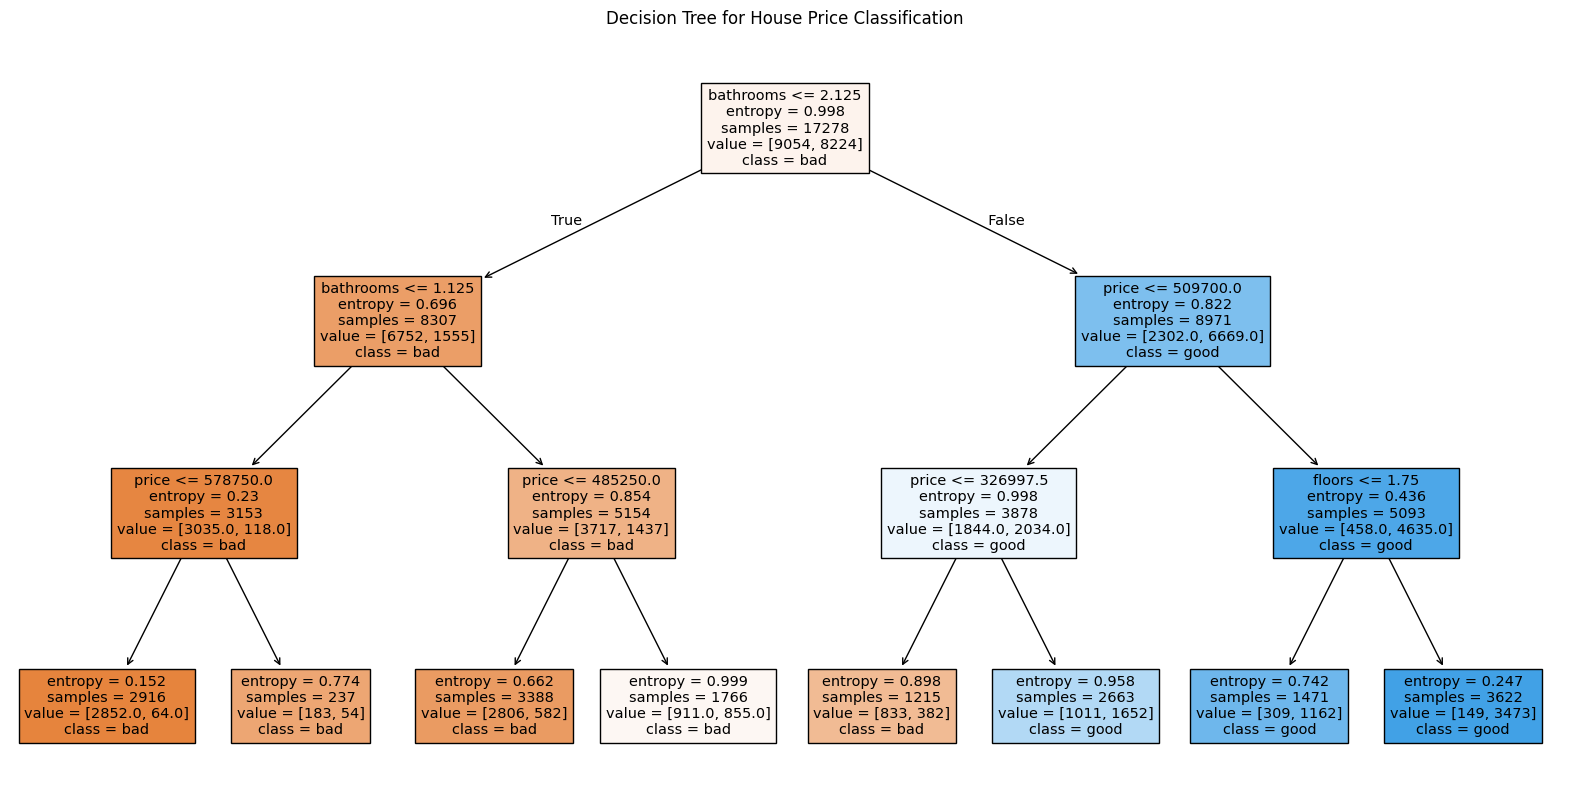

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
tree_clf.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=features, class_names=["bad", "good"])
plt.title("Decision Tree for House Price Classification")
plt.show()

We can see that the most informative feature is the number of bathrooms. It splits the training set into 9054 "bad" and 8224 "good" samples, which corresponds to a large Information Gain. Let's now evaluate the accuracy of our decision tree classifier.

In [9]:
from sklearn.metrics import accuracy_score

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of the decision tree on train data: {accuracy_train:.2%}")
print(f"Accuracy of the decision tree on test data: {accuracy_test:.2%}")

Accuracy of the decision tree on train data: 80.29%
Accuracy of the decision tree on test data: 79.63%


Not bad, we were able to identify in 79.63% of the cases, whether a house in the test set was "bad" or "good", i.e. if a house received a grade less or equal to 7 or if it achieved a higher grade. Now let's try to increase the maximum depth of the tree to 25 and see what happens.

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=25, criterion='entropy', random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of the decision tree on train data: {accuracy_train:.2%}")
print(f"Accuracy of the decision tree on test data: {accuracy_test:.2%}")

Accuracy of the decision tree on train data: 99.36%
Accuracy of the decision tree on test data: 78.73%


As you can see, a more complex tree may be able to memorize more of the training data, but that doesn't mean it generalizes better. In this case, our much simpler tree performed slightly better on the test set and therefore we would choose it over the more complex tree.